In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

data_URL = "/Users/kristivanmeter/Desktop/MIDS/Capstone/faces_cleaned_scaled.csv"
df = pd.read_csv(data_URL, encoding = "ISO-8859-1")
df.head()


,Unnamed: 0,movement,ImpVsExp,Age,CurrentGender,RaceEthnicity,Race,Political_1,stimuli,white_black,diversity_index,rt
0,0,0.0,Implicit,1.668957,Female,"White alone, not Hispanic or Latino",Dr.Dre,Conservative,0.137594,-0.003174,0.016759,1384
1,1,0.0,Implicit,1.726128,Male,"White alone, not Hispanic or Latino",Dr.Dre,Conservative,-1.121998,1.521377,-1.370266,519
2,2,0.0,Implicit,0.697064,Female,"White alone, not Hispanic or Latino",Dr.Dre,Strongly conservative,-0.198297,0.036459,-0.130286,828
3,3,0.0,Implicit,0.982915,Female,"White alone, not Hispanic or Latino",Dr.Dre,Moderate,1.481159,3.938986,-2.400829,1224
4,5,0.0,Implicit,-0.732192,Female,Black or African American alone,Dr.Dre,Moderate,-0.114324,-0.489188,-0.440224,686


In [2]:
df.shape

(332, 12)

### Predict response time based on features

In [3]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df)

# Define features and target variable
X = data_encoded.drop(columns=['rt'])
y = data_encoded['rt']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Support Vector Regression (SVR)
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
svr_predictions = svr_regressor.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR R^2:", svr_r2)

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R^2:", rf_r2)

# XGBoost
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost Mean Squared Error:", xgb_mse)
print("XGBoost R^2:", xgb_r2)


SVR Mean Squared Error: 152044.43673498245
SVR R^2: -0.09690333896942094
Random Forest Mean Squared Error: 123540.17193731344
Random Forest R^2: 0.10873669563394883
XGBoost Mean Squared Error: 151560.2467670183
XGBoost R^2: -0.09341021811633055


### Feature importance for response time based on random forest

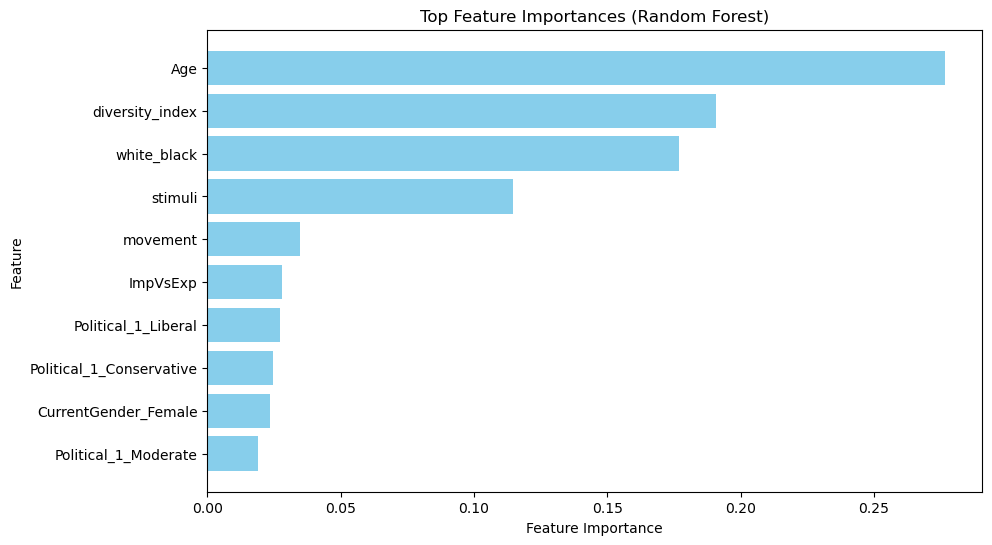

In [38]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# One-hot encode categorical variables
data_encoded = pd.get_dummies(df)

# Define features and target variable
X = data_encoded.drop(columns=['rt', 'Unnamed: 0'])
y = data_encoded['rt']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Extract feature importances
importance_scores = rf_regressor.feature_importances_

# Pair feature names with their importance scores
features = X.columns
importance_scores = dict(zip(features, importance_scores))

# Sort feature importances in descending order
sorted_importance_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Create a bar plot
num_features = 10  # Number of top features to display
top_features = [feature for feature, _ in sorted_importance_scores[:num_features]]
top_importances = [importance for _, importance in sorted_importance_scores[:num_features]]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


### Predict white_black based on other features

In [34]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df)

# Define features and target variable for predicting 'white_black'
X = data_encoded.drop(columns=['white_black'])
y = data_encoded['white_black']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression (SVR)
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
svr_predictions = svr_regressor.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR R^2:", svr_r2)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R^2:", rf_r2)

# XGBoost Regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost Mean Squared Error:", xgb_mse)
print("XGBoost R^2:", xgb_r2)


SVR Mean Squared Error: 0.9444406801800865
SVR R^2: -0.13231183144846814
Random Forest Mean Squared Error: 0.29582152859720773
Random Forest R^2: 0.6453327097643455
XGBoost Mean Squared Error: 0.45718174026024866
XGBoost R^2: 0.4518742103313784


### Feature Importance using XGBoost for white_black

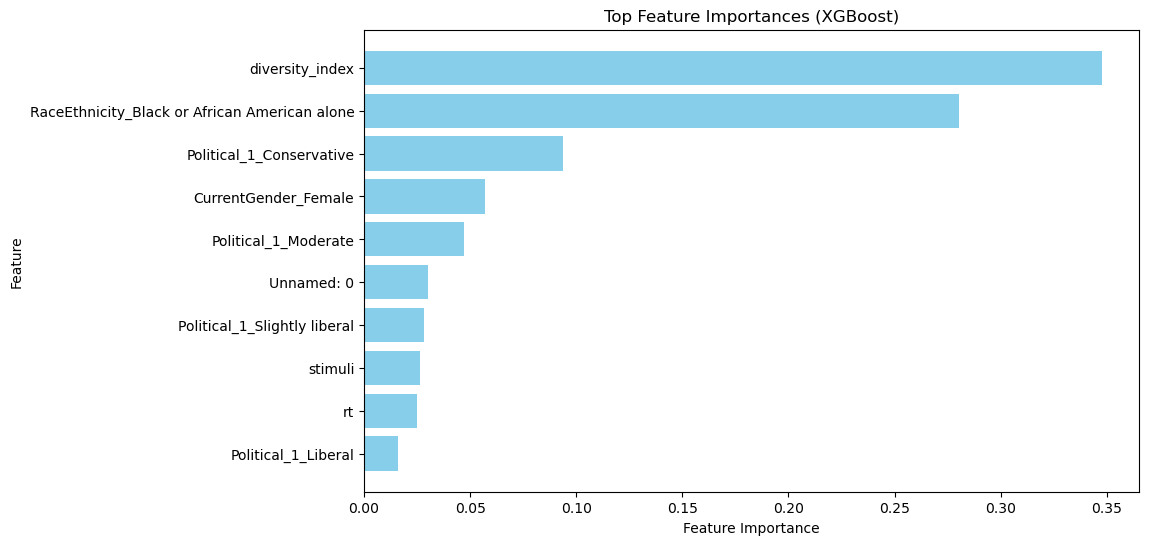

In [33]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# One-hot encode categorical variables
data_encoded = pd.get_dummies(df)

# Define features and target variable for predicting 'white_black'
X = data_encoded.drop(columns=['white_black'])
y = data_encoded['white_black']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

# Extract feature importances
importance_scores = xgb_regressor.feature_importances_

# Pair feature names with their importance scores
features = X.columns
importance_scores = dict(zip(features, importance_scores))

# Sort feature importances in descending order
sorted_importance_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Create a bar plot
num_features = 10  # Number of top features to display
top_features = [feature for feature, _ in sorted_importance_scores[:num_features]]
top_importances = [importance for _, importance in sorted_importance_scores[:num_features]]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances (XGBoost)')
plt.gca().invert_yaxis()
plt.show()


### Predict diversity_index 

In [30]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df)

# Define features and target variable for predicting 'diversity_index'
X = data_encoded.drop(columns=['diversity_index'])
y = data_encoded['diversity_index']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression (SVR)
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)
svr_predictions = svr_regressor.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print("SVR Mean Squared Error:", svr_mse)
print("SVR R^2:", svr_r2)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest Mean Squared Error:", rf_mse)
print("Random Forest R^2:", rf_r2)

# XGBoost Regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print("XGBoost Mean Squared Error:", xgb_mse)
print("XGBoost R^2:", xgb_r2)


SVR Mean Squared Error: 0.9609617343992988
SVR R^2: -0.07118116931266116
Random Forest Mean Squared Error: 0.43023243179963894
Random Forest R^2: 0.5204211958976175
XGBoost Mean Squared Error: 0.49849472669312445
XGBoost R^2: 0.4443294200792205


### Feature importance using XGBoost for diversity_index

In [31]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(df)

# Define features and target variable for predicting 'diversity_index'
X = data_encoded.drop(columns=['diversity_index'])
y = data_encoded['diversity_index']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)

# Extract feature importances
importance_scores = xgb_regressor.feature_importances_

# Pair feature names with their importance scores
features = X.columns
importance_scores = dict(zip(features, importance_scores))

# Sort feature importances in descending order
sorted_importance_scores = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)

# Display feature importances
print("Feature Importances:")
for feature, importance in sorted_importance_scores:
    print(f"{feature}: {importance}")


Feature Importances:
white_black: 0.45107194781303406
Political_1_Conservative: 0.08296594023704529
Political_1_Strongly conservative: 0.08046501129865646
Political_1_Slightly liberal: 0.07676751166582108
CurrentGender_Male: 0.04638253152370453
Political_1_Strongly liberal: 0.03800487145781517
stimuli: 0.03476538509130478
CurrentGender_Gender Variant-Non-Conforming: 0.03088562749326229
Age: 0.02777554839849472
Political_1_Slightly conservative: 0.02454008162021637
CurrentGender_Female: 0.022643424570560455
ImpVsExp: 0.022123532369732857
Unnamed: 0: 0.017848599702119827
rt: 0.016623985022306442
RaceEthnicity_Black or African American alone: 0.012035874649882317
movement: 0.007375134155154228
Political_1_Moderate: 0.004973541013896465
Political_1_Liberal: 0.0027514263056218624
RaceEthnicity_White alone, not Hispanic or Latino: 0.0
Race_Dr.Dre: 0.0


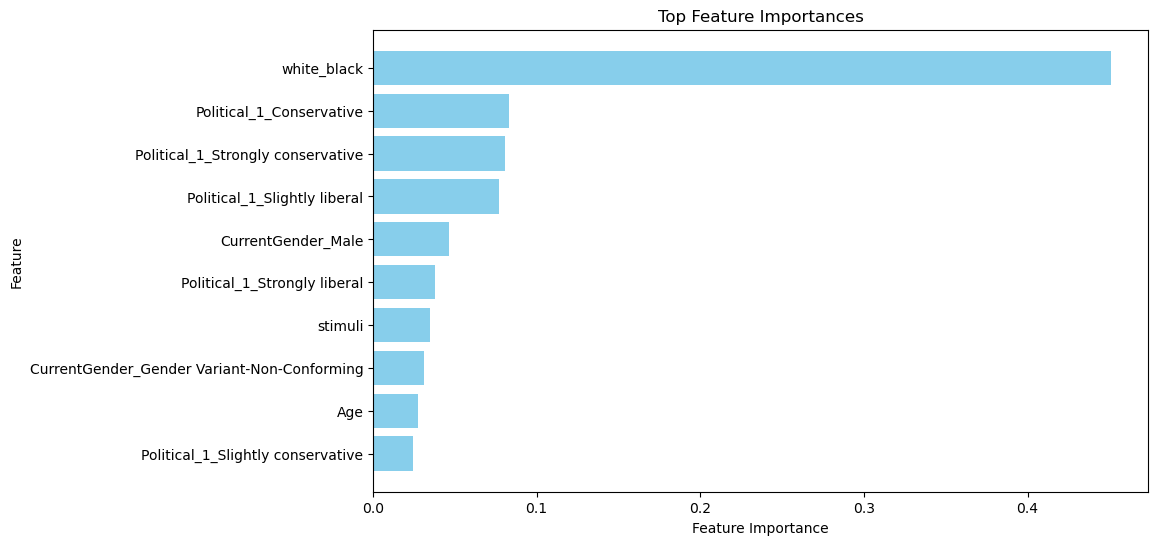

In [32]:
import matplotlib.pyplot as plt

# Define the number of features to display
num_features = 10  # You can adjust this value as needed

# Extract the top 'num_features' features and their importances
top_features = [feature for feature, _ in sorted_importance_scores[:num_features]]
top_importances = [importance for _, importance in sorted_importance_scores[:num_features]]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()
